## Simulação de uma LLM com memória da conversa (versão mais moderna do framework)

ref.: 
* https://python.langchain.com/docs/how_to/message_history/
* https://www.langchain.com/langgraph

**todo**:
- Tentar gerenciar a memória da conversa de forma automatizada

In [1]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph
from langchain_core.messages import RemoveMessage
from IPython.display import Image, display

## Utilização do llama3.1 com interface via ollama

In [2]:
llm = ChatOllama(model="llama3.1:latest")
workflow = StateGraph(state_schema=MessagesState)

def call_model(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {"messages": response}

workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

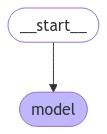

In [3]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Pergunta para iniciar a conversa

In [4]:
config = {"configurable": {"thread_id": "abc123"}}

query = "Quem foi Albert Einstein?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.


In [5]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72})]

## O modelo consegue se lembrar do que acabou de responder

In [6]:
query = "O que você disse?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Eu disse: Albert Einstein foi um físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica e recebeu o Prêmio Nobel de Física em 1921 por sua teoria dos fótons. Ele é famoso por suas contribuições fundamentais para a física, incluindo a teoria da relatividade e a equação E=mc².


In [7]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

In [8]:
query = "O que você disse? Ainda não consegui entender"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Não se preocupe! Vou explicar de forma mais simples.

Albert Einstein foi um cientista muito importante que viveu no século 20. Ele fez descobertas incríveis sobre a física, que é o estudo das coisas que acontecem na natureza.

Ele é famoso por três coisas principais:

1. **Teoria da Relatividade**: Einstein mostrou que o tempo e o espaço são relacionados entre si de forma muito complexa.
2. **Equação E=mc²**: Ele descobriu que a energia (E) é igual à massa (m) vezes a velocidade da luz (c) ao quadrado.
3. **Contribuições para a Física Quântica**: Einstein ajudou a entender como as partículas subatomicas se comportam.

Ele foi reconhecido com o Prêmio Nobel de Física em 1921, que é um prêmio muito importante para cientistas.

Espero que isso tenha ajudado a explicar melhor!


In [9]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

In [10]:
query = "Nasceu onde?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Albert Einstein nasceu em Ulma, no Reino da Württemberg (agora na Alemanha), em 14 de março de 1879.


In [11]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

In [12]:
query = "Quando?"
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

 Ele foi o primeiro filho de Hermann e Pauline Einstein, um banqueiro e uma dona de casa respeitáveis, respectivamente.


In [13]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

## Testando o isolamento de sessões

In [14]:
# trocando a sessão
config = {"configurable": {"thread_id": "def234"}}

query = "O que você disse por último?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Não disse nada, este é o início da nossa conversa. Como posso ajudá-lo?


In [15]:
output["messages"]

[HumanMessage(content='O que você disse por último?', additional_kwargs={}, response_metadata={}, id='3abed28e-afbd-4356-a0d3-c95c83b90585'),
 AIMessage(content='Não disse nada, este é o início da nossa conversa. Como posso ajudá-lo?', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:39.737252603Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1296237598, 'load_duration': 58623843, 'prompt_eval_count': 17, 'prompt_eval_duration': 115020000, 'eval_count': 22, 'eval_duration': 1071833000}, id='run-597d92aa-c67c-4918-968f-2a8465a35c1b-0', usage_metadata={'input_tokens': 17, 'output_tokens': 22, 'total_tokens': 39})]

In [16]:
# retornando a sessão anterior
config = {"configurable": {"thread_id": "abc123"}}

query = "O que você disse por último?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Eu disse: Albert Einstein nasceu em Ulma, na Alemanha, em 14 de março de 1879.


In [17]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

## Removendo as 2 primeiras interações (para não entupir de tokens)

In [18]:
messages = app.get_state(config).values["messages"]
messages

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='a2f960a6-8a02-4d4a-8010-6a44cd340042'),
 AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert

In [19]:
app.update_state(config, {"messages": RemoveMessage(id=messages[0].id)})
messages = app.get_state(config).values["messages"]
messages

[AIMessage(content='Físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica. Foi laureado com o Prêmio Nobel de Física em 1921, por sua teoria dos fótons.', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:16.684110004Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7704218474, 'load_duration': 4900527603, 'prompt_eval_count': 16, 'prompt_eval_duration': 130275000, 'eval_count': 56, 'eval_duration': 2671709000}, id='run-9fd5b986-9443-45e9-b893-4caf33c024cf-0', usage_metadata={'input_tokens': 16, 'output_tokens': 56, 'total_tokens': 72}),
 HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert Einstein foi um físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica e recebeu o Prêmio Nobel de

In [20]:
app.update_state(config, {"messages": RemoveMessage(id=messages[0].id)})
messages = app.get_state(config).values["messages"]
messages

[HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert Einstein foi um físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica e recebeu o Prêmio Nobel de Física em 1921 por sua teoria dos fótons. Ele é famoso por suas contribuições fundamentais para a física, incluindo a teoria da relatividade e a equação E=mc².', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:21.643757961Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4943372899, 'load_duration': 59324907, 'prompt_eval_count': 86, 'prompt_eval_duration': 135381000, 'eval_count': 91, 'eval_duration': 4597798000}, id='run-ab0a9357-53b2-4bd1-b0c3-9c53320baefc-0', usage_metadata={'input_tokens': 86, 'output_tokens': 91, 'total_tokens': 177}),
 HumanMessage(content='O que você 

## Retomando a conversa (para verificar se continua coerente)

In [21]:
query = "Qual foi a maior contribuição dele?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

A maior contribuição de Albert Einstein é considerada ser a sua teoria da relatividade.

Em 1905 e 1915, ele desenvolveu duas teorias revolucionárias que mudaram o modo como as pessoas entendem o tempo e o espaço:

1. **Teoria da Relatividade Especial** (1905): Demonstrou que o tempo e o espaço são relativo ao observador, e que a velocidade da luz é sempre constante.
2. **Teoria da Relatividade Geral** (1915): Descreveu como a gravidade afeta o espaço-tempo, mostrando que as massas curvam o espaço-tempo em torno delas.

Essas teorias revolucionaram a física e tiveram um impacto profundo na forma como entendemos o universo.


In [22]:
output["messages"]

[HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='317dbdc7-08e2-4d64-b96c-9988c6aa0c42'),
 AIMessage(content='Eu disse: Albert Einstein foi um físico alemão que fez contribuições significativas para o desenvolvimento da mecânica quântica e recebeu o Prêmio Nobel de Física em 1921 por sua teoria dos fótons. Ele é famoso por suas contribuições fundamentais para a física, incluindo a teoria da relatividade e a equação E=mc².', additional_kwargs={}, response_metadata={'model': 'llama3.1:latest', 'created_at': '2024-10-05T16:46:21.643757961Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4943372899, 'load_duration': 59324907, 'prompt_eval_count': 86, 'prompt_eval_duration': 135381000, 'eval_count': 91, 'eval_duration': 4597798000}, id='run-ab0a9357-53b2-4bd1-b0c3-9c53320baefc-0', usage_metadata={'input_tokens': 86, 'output_tokens': 91, 'total_tokens': 177}),
 HumanMessage(content='O que você 